<a href="https://colab.research.google.com/github/skhazaei/TensorFlow-repo/blob/master/pre_tokenized_imdb_dataset_on_subWords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download imdb sub words dataset from `tensorflow_datasets`

In [2]:
import tensorflow_datasets as tfds

imdb, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete8JM78R/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete8JM78R/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete8JM78R/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


## Split the dataset into train and test sets

In [15]:
train_data, test_data = imdb['train'], imdb['test']
print ('train set size: {}'.format(len(imdb['train'])))
print ('test set size: {}'.format(len(imdb['test'])))

train set size: 25000
test set size: 25000


## take the tokenizer (**check this later**)

In [5]:
tokenizer = info.features['text'].encoder

In [6]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

## Check how this encodes and decodes the strings

In [10]:
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print('tokenized string is: {}'.format(tokenized_string))

tokenized string is: [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]


In [11]:
original_string = tokenizer.decode(tokenized_string)
print('The original string is: {}'.format(original_string))

The original string is: TensorFlow, from basics to mastery


## Let's check the tokens themselves in `tokenized_string`

In [13]:
for ts in tokenized_string:
  print('{}--->{}'.format(ts, tokenizer.decode([ts])))

6307--->Ten
2327--->sor
4043--->Fl
2120--->ow
2--->, 
48--->from 
4249--->basi
4429--->cs 
7--->to 
2652--->master
8050--->y


###  As it can be seen, the sub words tokenization is case sensitive and punctuation is maintained unlike the tokenizer. 

## IMDB classification

In [18]:
import tensorflow as tf

embedding_dim = 64

model = tf.keras.models.Sequential([tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
                                    tf.keras.layers.GlobalAveragePooling1D(),
                                    tf.keras.layers.Dense(6, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [26]:
 model.compile(optimizer=tf.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

*Check this later*

`padded_batch(
    batch_size, padded_shapes=None, padding_values=None, drop_remainder=False
)`

In [27]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [28]:
num_epochs = 10

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 18s 42ms/step - loss: 0.6856 - accuracy: 0.5651 - val_loss: 0.6118 - val_accuracy: 0.7580
Epoch 2/10
391/391 [==============================] - 17s 42ms/step - loss: 0.5542 - accuracy: 0.7892 - val_loss: 0.4330 - val_accuracy: 0.8463
Epoch 3/10
391/391 [==============================] - 17s 42ms/step - loss: 0.3803 - accuracy: 0.8709 - val_loss: 0.3539 - val_accuracy: 0.8644
Epoch 4/10
391/391 [==============================] - 17s 43ms/step - loss: 0.2992 - accuracy: 0.8942 - val_loss: 0.3241 - val_accuracy: 0.8752
Epoch 5/10
391/391 [==============================] - 17s 42ms/step - loss: 0.2591 - accuracy: 0.9066 - val_loss: 0.3109 - val_accuracy: 0.8796
Epoch 6/10
391/391 [==============================] - 17s 43ms/step - loss: 0.2325 - accuracy: 0.9178 - val_loss: 0.3046 - val_accuracy: 0.8819
Epoch 7/10
391/391 [==============================] - 18s 44ms/step - loss: 0.2074 - accuracy: 0.9267 - val_loss: 0.3037 - val_accuracy:

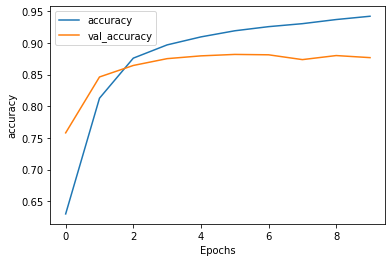

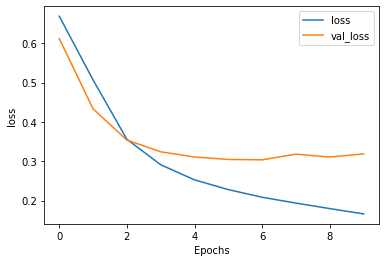

In [29]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### Note that we're using sub-words and not for-words, sub-word meanings are often nonsensical and it's only when we put them together in sequences that they have meaningful semantics. 